## Loading data

In [3]:
import numpy as np
import json

data = []
with open('202108_labeled_calibration_sample3.json', 'r') as json_file:
    for line in json_file:
        data.append(json.loads(line))

In [5]:
worker_list = []
for d in data:
    for r in d['composite_offensive']:
        if r[1] not in worker_list:
            worker_list.append(r[1])

In [7]:
question_list_llm = ['composite_hateful', 'composite_offensive', 'composite_toxic']
question_list_llm2 = ['composite_hateful2', 'composite_offensive2', 'composite_toxic2']

human_data = np.full((len(worker_list), len(data), 3), np.nan)
for i in range(len(data)):
    for j,q in enumerate(question_list_llm):
        responses = data[i][q]
        for k in range(len(responses)):
            index = worker_list.index(responses[k][1])
            r = responses[k][0]
            human_data[index, i, j] = r

answer_question = []
for i in range(np.size(human_data, axis = 0)):
    valid_index = np.where(~np.isnan(human_data[i,:,0]))[0]
    answer_question.append(len(valid_index))

print(np.average(answer_question))

72.9746835443038


In [9]:
import torch

def lowercase_keys(d):
    new_d = {}
    for k, v in d.items():
        for kk in v.keys():
            new_v = {kk.strip().lower(): v[kk].lower()}
        new_d[k.lower()] = new_v
    return new_d

file_path = 'toxicity/text_for_labeling/gpt-3.5-turbo/total_output_labels.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
gpt3_data = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        question = 'question ' + str(j+1)
        if dt[question][q] == 'Yes' or dt[question][q] == 'yes':
            gpt3_data[i, j] = 1
        elif dt[question][q] == 'No' or dt[question][q] == 'no':
            gpt3_data[i, j] = 0

file_path = 'toxicity/text_for_labeling/gpt-3.5-turbo/total_output_labels_2.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
gpt3_data_2 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        for key in dt.keys():
            if q in dt[key].keys():
                if dt[key][q] == 'Yes' or dt[key][q] == 'yes':
                    gpt3_data_2[i, j] = 1
                elif dt[key][q] == 'No' or dt[key][q] == 'no':
                    gpt3_data_2[i, j] = 0

file_path = 'toxicity/text_for_labeling/gpt-3.5-turbo/total_output_labels_3.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
gpt3_data_3 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        question = 'question ' + str(j+1)
        if question not in dt.keys():
            continue
        if q not in dt[question].keys():
            continue
        if dt[question][q] == 'Yes' or dt[question][q] == 'yes':
            gpt3_data_3[i, j] = 1
        elif dt[question][q] == 'No' or dt[question][q] == 'no':
            gpt3_data_3[i, j] = 0


file_path = 'toxicity/text_for_labeling/gpt-4o-mini/total_output_labels.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
gpt4_data = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        question = 'question ' + str(j+1)
        if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
            gpt4_data[i, j] = 1
        elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
            gpt4_data[i, j] = 0

file_path = 'toxicity/text_for_labeling/gpt-4o-mini_1/total_output_labels.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
gpt4_data_2 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        question = 'question ' + str(j+1)
        if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
            gpt4_data_2[i, j] = 1
        elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
            gpt4_data_2[i, j] = 0


file_path = 'toxicity/text_for_labeling/gpt-4o-mini_2/total_output_labels.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
gpt4_data_3 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        question = 'question ' + str(j+1)
        if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
            gpt4_data_3[i, j] = 1
        elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
            gpt4_data_3[i, j] = 0


def lowercase_keys(d):
    return {k.lower(): v for k,v in d.items()}

file_path = 'toxicity/text_for_labeling/gemma-2-2b-it/output_labels_all.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
gemma_data = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        if 'question 1' not in dt.keys():
            continue
        if 'question 3' not in dt.keys():
            if dt['question 1'][q]:
                gemma_data[i, j] = 1
            else:
                gemma_data[i, j] = 0
            continue
            
        question = 'question ' + str(j+1)
        if type(dt[question]) == dict:
            if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
                gemma_data[i, j] = 1
            elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
                gemma_data[i, j] = 0
        else:
            if dt[question] == 'yes':
                gemma_data[i, j] = 1
            elif dt[question] == 'no':
                gemma_data[i, j] = 0

file_path = 'toxicity/text_for_labeling/gemma-2-2b-it_1/output_labels_all.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
gemma_data_2 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        if 'question 1' not in dt.keys():
            continue
        if 'question 3' not in dt.keys():
            if dt['question 1'][q]:
                gemma_data_2[i, j] = 1
            else:
                gemma_data_2[i, j] = 0
            continue
            
        question = 'question ' + str(j+1)
        if type(dt[question]) == dict:
            if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
                gemma_data_2[i, j] = 1
            elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
                gemma_data_2[i, j] = 0
        else:
            if dt[question] == 'yes':
                gemma_data_2[i, j] = 1
            elif dt[question] == 'no':
                gemma_data_2[i, j] = 0


file_path = 'toxicity/text_for_labeling/gemma-2-2b-it_2/output_labels_all.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
gemma_data_3 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        if 'question 1' not in dt.keys():
            continue
        if type(dt['question 1']) != dict:
            continue
        if len(dt['question 1'].keys()) > 1:
            continue
        if 'question 3' not in dt.keys():
            if dt['question 1'][q]:
                gemma_data_3[i, j] = 1
            else:
                gemma_data_3[i, j] = 0
            continue
            
        question = 'question ' + str(j+1)
        if type(dt[question]) == dict:
            if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
                gemma_data_3[i, j] = 1
            elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
                gemma_data_3[i, j] = 0
        else:
            if dt[question] == 'yes':
                gemma_data_3[i, j] = 1
            elif dt[question] == 'no':
                gemma_data_3[i, j] = 0

file_path = 'toxicity/text_for_labeling/Mistral-7B-Instruct-v0.3/output_labels_all.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
mistral_data = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        if 'toxic' in dt.keys() and j == 2:
            if dt[q] == 'Yes':
                mistral_data[i, j] = 1
            elif dt[q] == 'No':
                mistral_data[i, j] = 0
            continue
        if 'question 1' not in dt.keys():
            continue
        if 'question 3' not in dt.keys():
            if dt['question 1'][q]:
                mistral_data[i, j] = 1
            else:
                mistral_data[i, j] = 0
            continue
            
        question = 'question ' + str(j+1)
        if type(dt[question]) == dict:
            if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
                mistral_data[i, j] = 1
            elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
                mistral_data[i, j] = 0
        else:
            if dt[question] == 'yes':
                mistral_data[i, j] = 1
            elif dt[question] == 'no':
                mistral_data[i, j] = 0


file_path = 'toxicity/text_for_labeling/Mistral-7B-Instruct-v0.3_1/output_labels_all.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
mistral_data_2 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        if 'toxic' in dt.keys() and j == 2:
            if dt[q] == 'Yes':
                mistral_data_2[i, j] = 1
            elif dt[q] == 'No':
                mistral_data_2[i, j] = 0
            continue
        if 'question 1' not in dt.keys():
            continue
        if 'question 3' not in dt.keys():
            if dt['question 1'][q]:
                mistral_data_2[i, j] = 1
            else:
                mistral_data_2[i, j] = 0
            continue
            
        question = 'question ' + str(j+1)
        if type(dt[question]) == dict:
            if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
                mistral_data_2[i, j] = 1
            elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
                mistral_data_2[i, j] = 0
        else:
            if dt[question] == 'yes':
                mistral_data_2[i, j] = 1
            elif dt[question] == 'no':
                mistral_data_2[i, j] = 0


file_path = 'toxicity/text_for_labeling/Mistral-7B-Instruct-v0.3_2/output_labels_all.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
mistral_data_3 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        if 'toxic' in dt.keys() and j == 2:
            if dt[q] == 'Yes':
                mistral_data_3[i, j] = 1
            elif dt[q] == 'No':
                mistral_data_3[i, j] = 0
            continue
        if 'question 1' not in dt.keys():
            continue
        if 'question 3' not in dt.keys():
            if dt['question 1'][q]:
                mistral_data_3[i, j] = 1
            else:
                mistral_data_3[i, j] = 0
            continue
            
        question = 'question ' + str(j+1)
        if type(dt[question]) == dict:
            if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
                mistral_data_3[i, j] = 1
            elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
                mistral_data_3[i, j] = 0
        else:
            if dt[question] == 'yes':
                mistral_data_3[i, j] = 1
            elif dt[question] == 'no':
                mistral_data_3[i, j] = 0
       

file_path = 'toxicity/text_for_labeling/Phi-3.5-mini-instruct/output_labels_all.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
phi_data = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        if 'hateful' in dt.keys() and j == 0:
            if dt[q] == 'Yes':
                phi_data[i, j] = 1
            elif dt[q] == 'No':
                phi_data[i, j] = 0
            continue
        if 'offensive' in dt.keys() and j == 1:
            if dt[q] == 'Yes':
                phi_data[i, j] = 1
            elif dt[q] == 'No':
                phi_data[i, j] = 0
            continue
        if 'toxic' in dt.keys() and j == 2:
            if dt[q] == 'Yes':
                phi_data[i, j] = 1
            elif dt[q] == 'No':
                phi_data[i, j] = 0
            continue
        if 'question 1' not in dt.keys():
            continue
        if 'question 3' not in dt.keys():
            if dt['question 1'][q]:
                phi_data[i, j] = 1
            else:
                phi_data[i, j] = 0
            continue
            
        question = 'question ' + str(j+1)
        if type(dt[question]) == dict:
            if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
                phi_data[i, j] = 1
            elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
                phi_data[i, j] = 0
        else:
            if dt[question] == 'yes':
                phi_data[i, j] = 1
            elif dt[question] == 'no':
                phi_data[i, j] = 0


file_path = 'toxicity/text_for_labeling/Phi-3.5-mini-instruct_1/output_labels_all.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
phi_data_2 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        if 'hateful' in dt.keys() and j == 0:
            if dt[q] == 'Yes':
                phi_data_2[i, j] = 1
            elif dt[q] == 'No':
                phi_data_2[i, j] = 0
            continue
        if 'offensive' in dt.keys() and j == 1:
            if dt[q] == 'Yes':
                phi_data_2[i, j] = 1
            elif dt[q] == 'No':
                phi_data_2[i, j] = 0
            continue
        if 'toxic' in dt.keys() and j == 2:
            if dt[q] == 'Yes':
                phi_data_2[i, j] = 1
            elif dt[q] == 'No':
                phi_data_2[i, j] = 0
            continue
        if 'question 1' not in dt.keys():
            continue
        if 'question 3' not in dt.keys():
            if dt['question 1'][q]:
                phi_data_2[i, j] = 1
            else:
                phi_data_2[i, j] = 0
            continue

        question = 'question ' + str(j+1)
        if type(dt[question]) == dict:
            if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
                phi_data_2[i, j] = 1
            elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
                phi_data_2[i, j] = 0
        else:
            if dt[question] == 'yes':
                phi_data_2[i, j] = 1
            elif dt[question] == 'no':
                phi_data_2[i, j] = 0


file_path = 'toxicity/text_for_labeling/Phi-3.5-mini-instruct_2/output_labels_all.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
phi_data_3 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        if 'hateful' in dt.keys() and j == 0:
            if dt[q] == 'Yes':
                phi_data_3[i, j] = 1
            elif dt[q] == 'No':
                phi_data_3[i, j] = 0
            continue
        if 'offensive' in dt.keys() and j == 1:
            if dt[q] == 'Yes':
                phi_data_3[i, j] = 1
            elif dt[q] == 'No':
                phi_data_3[i, j] = 0
            continue
        if 'toxic' in dt.keys() and j == 2:
            if dt[q] == 'Yes':
                phi_data_3[i, j] = 1
            elif dt[q] == 'No':
                phi_data_3[i, j] = 0
            continue
        if 'question 1' not in dt.keys():
            continue
        if 'question 3' not in dt.keys():
            if dt['question 1'][q]:
                phi_data_3[i, j] = 1
            else:
                phi_data_3[i, j] = 0
            continue

        question = 'question ' + str(j+1)
        if type(dt[question]) == dict:
            if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
                phi_data_3[i, j] = 1
            elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
                phi_data_3[i, j] = 0
        else:
            if dt[question] == 'yes':
                phi_data_3[i, j] = 1
            elif dt[question] == 'no':
                phi_data_3[i, j] = 0

/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_32318/1880278204.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  llm_data = np.array(torch.load(file_path))
/

## Compute tvd mutual information

In [11]:
"""
Compute joint distributions
"""

import numpy as np
from collections import Counter
from collections import defaultdict

def empirical_joint(v1, v2, K):
    v1 = np.array(v1)
    v2 = np.array(v2)
    
    mask = ~np.isnan(v1) & ~np.isnan(v2)
    
    valid_pairs = list(zip(v1[mask], v2[mask]))
    
    pair_counts = Counter(valid_pairs)
    
    joint_matrix = np.zeros((K, K))
    
    value_to_index = {val: idx for idx, val in enumerate(list(np.arange(K)))}
    
    total_pairs = len(valid_pairs)
    for (a, b), count in pair_counts.items():
        i, j = value_to_index[a], value_to_index[b]
        joint_matrix[i, j] = count / total_pairs
    
    return joint_matrix

def empirical_joint_conditioned(v1, v2, v3, K):
    # Ensure inputs are numpy arrays
    v1 = np.array(v1)
    v2 = np.array(v2)
    v3 = np.array(v3)
    
    # Map each value in sigma to an index
    value_to_index = {val: idx for idx, val in enumerate(list(np.arange(K)))}
    
    # Initialize conditioned joint distribution tensor
    joint_tensor = np.zeros((K, K, K))
    
    # Create a defaultdict to count occurrences conditioned on v3
    conditioned_counts = defaultdict(Counter)
    
    # Mask to filter out nan entries in all vectors
    mask = ~np.isnan(v1) & ~np.isnan(v2) & ~np.isnan(v3)
    
    # Extract valid triples
    valid_triples = list(zip(v1[mask], v2[mask], v3[mask]))
    
    # Count occurrences of each pair (v1, v2) conditioned on v3
    for a, b, c in valid_triples:
        i, j, k = value_to_index[a], value_to_index[b], value_to_index[c]
        joint_tensor[k,i,j] += 1
    joint_tensor = joint_tensor / len(valid_triples)
    return joint_tensor

v1 = [1, 2, np.nan, 3, 1, 2]
v2 = [2, 2, 3, np.nan, 1, 3]
v3 = [1, 1, 2, 2, 1, np.nan]
tensor = empirical_joint_conditioned(v1, v2, v3, 4)

In [13]:
def Divergence(joint_matrix):
    P_X1 = np.sum(joint_matrix, axis=1)  # Sum over rows to get P(X1)
    P_X2 = np.sum(joint_matrix, axis=0)  # Sum over columns to get P(X2)
    product_matrix = np.outer(P_X1, P_X2)
    
    mask = (joint_matrix > 0) & (product_matrix > 0)
    
    # Compute KL divergence: sum(P(X1, X2) * log(P(X1, X2) / (P(X1) * P(X2))))
    kl_divergence = np.sum(joint_matrix[mask] * np.log(joint_matrix[mask] / product_matrix[mask]))
    tvd_divergence = np.sum(np.abs(joint_matrix - product_matrix))
    supremum_norm = np.max(np.abs(joint_matrix - product_matrix))
    
    return kl_divergence, tvd_divergence, supremum_norm


def Divergence_conditioned(joint_tensor):
    kl_divergences = 0
    tvd_divergence = 0
    supremum_norm = 0
    
    for k in range(K):
        joint_matrix = joint_tensor[k]
        
        if np.sum(joint_matrix) > 0:
            joint_matrix_norm = joint_matrix/np.sum(joint_matrix)
            kl, tvd, sup = Divergence(joint_matrix_norm)
        else:
            kl, tvd, sup = 0,0,0

        kl_divergences += np.sum(joint_matrix)*kl
        tvd_divergence += np.sum(joint_matrix)*tvd
        supremum_norm = np.max((supremum_norm, sup))

    return kl_divergences, tvd_divergence, supremum_norm

In [15]:
K = 2
q = 2

human_data_non_nan = np.full((4, len(data)), np.nan)
for j in range(len(data)):
    non_nan = np.where(~np.isnan(human_data[:,j,q]))[0]
    for i in range(4):
        human_data_non_nan[i,j] = human_data[non_nan[i],j,q]

def majority_element_vector(vec):
    # Convert to a list if it's not already
    vec_list = list(vec)
    counter = Counter(vec_list)
    # most_common(1) returns a list of (elem, count) with the highest count
    element, count = counter.most_common(1)[0]
    return int(element)

ground_truth = np.zeros(len(data))
for i in range(len(data)):
    ground_truth[i] = majority_element_vector(human_data_non_nan[1:,i])

conditioned_list = [gpt3_data_3[:,q], gpt4_data_3[:,q], gemma_data_3[:,q], mistral_data_3[:,q], phi_data_3[:,q]]
response_list = [human_data_non_nan[0], gpt3_data[:,q], gpt4_data[:,q], gemma_data[:,q], mistral_data[:,q], phi_data[:,q]]
names = ['Human', 'GPT-3.5', 'GPT-4', 'Gemma', 'Mistral', 'Phi']

kl_d_uncond = np.zeros(len(response_list))
tvd_d_uncond = np.zeros(len(response_list))
for j, response in enumerate(response_list):
    joint = empirical_joint(response, ground_truth, K)
    kl_d_uncond[j], tvd_d_uncond[j], _ = Divergence(joint)

kl_divergence = np.zeros((len(conditioned_list), len(response_list)))
tvd_divergence = np.zeros((len(conditioned_list), len(response_list)))
for i, conditioned_r in enumerate(conditioned_list):
    for j, response in enumerate(response_list):
        joint_cond = empirical_joint_conditioned(response, ground_truth, conditioned_r, K)
        kl, tvd, _ = Divergence_conditioned(joint_cond)
        kl_divergence[i, j] = kl_d_uncond[j] - kl
        tvd_divergence[i, j] = tvd_d_uncond[j] - tvd


In [17]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def plot_grouped_bar_chart(matrix, group_names, bar_names):
    """
    Plots a grouped bar chart for the given n*m matrix with custom colors.
    
    Parameters:
    matrix (numpy.ndarray): A 2D NumPy array of shape (n, m) where n is the number of groups
                            and m is the number of bars in each group.
    group_names (list): A list of length n containing the names of the groups.
    bar_names (list): A list of length m containing the names of the bars.
    """
    n, m = matrix.shape
    x = np.arange(n)  # Group positions
    width = 0.8 / m   # Width of each bar, evenly spaced within each group
    
    # Custom colors for the bars
    colors = ['#d62728', '#ff7f0e', '#e69f00', '#2ca02c', '#9cd2db', '#1f77b4', '#7600c4']
    
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each set of bars for each group with custom colors
    for i in range(m):
        ax.bar(x + i * width, matrix[:, i], width, label=bar_names[i], color=colors[i])
    
    # Add labels and title
    ax.set_xlabel(r'Conditioned LLM $Z$', fontsize = 18)
    ax.set_ylabel(r'$I_{\text{TVD}}(Z_i; X_j\mid Z)$', fontsize = 18)
    ax.set_xticks(x + width * (m - 1) / 2)
    ax.set_xticklabels(group_names, fontsize = 17)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='y', labelsize=15)
    ax.legend(fontsize = 14)
    
    plt.tight_layout()
    plt.show()

In [19]:
human_data_non_nan = np.full((4, len(data)), np.nan)
for j in range(len(data)):
    non_nan = np.where(~np.isnan(human_data[:,j,q]))[0]
    for i in range(4):
        human_data_non_nan[i,j] = human_data[non_nan[i],j,q]

def majority_element_vector(vec):
    # Convert to a list if it's not already
    vec_list = list(vec)
    counter = Counter(vec_list)
    # most_common(1) returns a list of (elem, count) with the highest count
    element, count = counter.most_common(1)[0]
    return int(element)

ground_truth = np.zeros(len(data))
for i in range(len(data)):
    ground_truth[i] = majority_element_vector(human_data_non_nan[1:,i])

prior =  np.bincount(ground_truth.astype(int).tolist(), minlength=K) / len(ground_truth)
random_data = np.random.choice(len(prior), size=len(ground_truth), p=prior)

conditioned_list = [gpt3_data_3[:,q], gpt4_data_3[:,q], gemma_data_3[:,q], mistral_data_3[:,q], phi_data_3[:,q]]
response_list = [random_data, human_data_non_nan[0], gpt3_data[:,q], gpt4_data[:,q], gemma_data[:,q], mistral_data[:,q], phi_data[:,q]]
names = ['Random Cheater', 'Human', 'GPT-3.5', 'GPT-4', 'Gemma', 'Mistral', 'Phi']

kl_divergence = np.zeros((len(conditioned_list)+1, len(response_list)))
tvd_divergence = np.zeros((len(conditioned_list)+1, len(response_list)))
for j, response in enumerate(response_list):
    joint = empirical_joint(response, ground_truth, K)
    kl_divergence[0,j], tvd_divergence[0,j], _ = Divergence(joint)
    
for i, conditioned_r in enumerate(conditioned_list):
    for j, response in enumerate(response_list):
        joint_cond = empirical_joint_conditioned(response, ground_truth, conditioned_r, K)
        kl, tvd, _ = Divergence_conditioned(joint_cond)
        kl_divergence[i+1, j] = kl
        tvd_divergence[i+1, j] = tvd


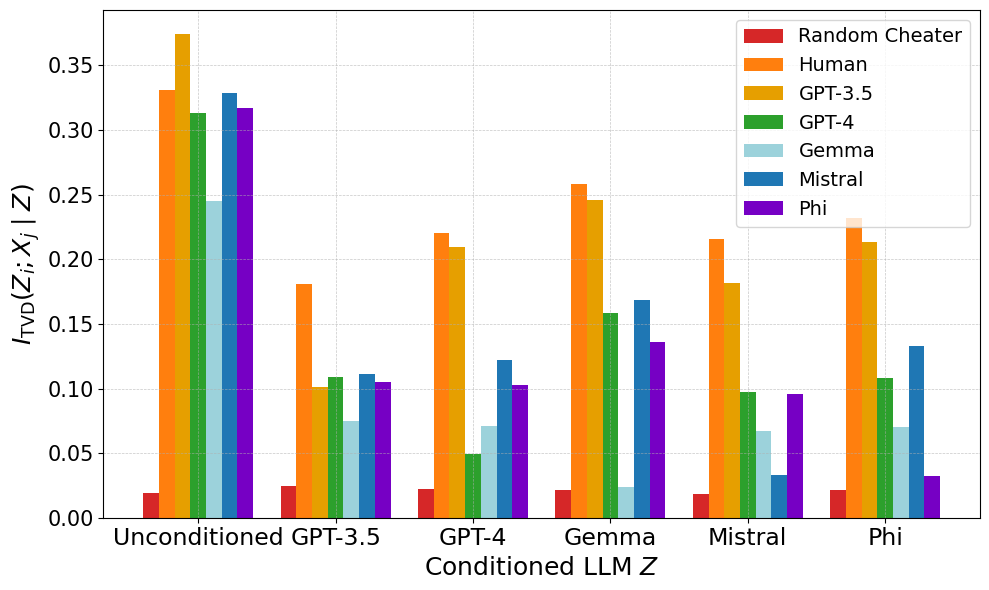

In [21]:
group_names = ['Unconditioned', 'GPT-3.5', 'GPT-4', 'Gemma', 'Mistral', 'Phi']
bar_names = names
plot_grouped_bar_chart(tvd_divergence, group_names, bar_names)

In [23]:
def empirical_joint_conditioned_v2(v1, v2, v3, v4, K):
    # Ensure inputs are numpy arrays
    v1 = np.array(v1)
    v2 = np.array(v2)
    v3 = np.array(v3)
    v4 = np.array(v4)
    
    # Map each value in sigma to an index
    value_to_index = {val: idx for idx, val in enumerate(list(np.arange(K)))}
    
    # Initialize conditioned joint distribution tensor
    joint_tensor = np.zeros((K, K, K, K))
    
    # Create a defaultdict to count occurrences conditioned on v3
    conditioned_counts = defaultdict(Counter)
    
    # Mask to filter out nan entries in all vectors
    mask = ~np.isnan(v1) & ~np.isnan(v2) & ~np.isnan(v3) & ~np.isnan(v4)
    
    # Extract valid triples
    valid_triples = list(zip(v1[mask], v2[mask], v3[mask], v4[mask]))
    
    # Count occurrences of each pair (v1, v2) conditioned on v3
    for a, b, c, d in valid_triples:
        i, j, k, l = value_to_index[a], value_to_index[b], value_to_index[c], value_to_index[d]
        joint_tensor[k,l,i,j] += 1
    joint_tensor = joint_tensor / len(valid_triples)
    return joint_tensor

def Divergence_conditioned_v2(joint_tensor):
    kl_divergences = 0
    tvd_divergence = 0
    supremum_norm = 0
    
    for kz in range(K):
        for ky in range(K):
            joint_matrix = joint_tensor[kz, ky]
            
            if np.sum(joint_matrix) > 0:
                joint_matrix_norm = joint_matrix/np.sum(joint_matrix)
                kl, tvd, sup = Divergence(joint_matrix_norm)
            else:
                kl, tvd, sup = 0,0,0
    
            kl_divergences += np.sum(joint_matrix)*kl
            tvd_divergence += np.sum(joint_matrix)*tvd
            supremum_norm = np.max((supremum_norm, sup))

    return kl_divergences, tvd_divergence, supremum_norm

In [39]:
K = 2
q = 2

human_data_non_nan = np.full((4, len(data)), np.nan)
for j in range(len(data)):
    non_nan = np.where(~np.isnan(human_data[:,j,q]))[0]
    for i in range(4):
        human_data_non_nan[i,j] = human_data[non_nan[i],j,q]

conditioned_list = [gpt3_data[:,q], gpt4_data[:,q], gemma_data[:,q], mistral_data[:,q], phi_data[:,q]]
response_list_1 = [gpt3_data_3[:,q], gpt4_data_3[:,q], gemma_data_3[:,q], mistral_data_3[:,q], phi_data_3[:,q]]
response_list_2 = [gpt3_data_2[:,q], gpt4_data_2[:,q], gemma_data_2[:,q], mistral_data_2[:,q], phi_data_2[:,q]]
names = ['GPT-3.5', 'GPT-4', 'Gemma', 'Mistral', 'Phi']

tvd_cond_zz = np.zeros((len(response_list_1), len(response_list_2)))
for i, response_1 in enumerate(response_list_1):
    conditioned_r = conditioned_list[i]
    for j, response_2 in enumerate(response_list_2):
        joint_cond = empirical_joint_conditioned_v2(response_1, response_2, conditioned_r, ground_truth, K)
        kl, tvd, _ = Divergence_conditioned_v2(joint_cond)
        tvd_cond_zz[i, j] = tvd

tvd_cond_human = np.zeros(len(conditioned_list))
for i, conditioned_r in enumerate(conditioned_list):
    joint_cond = empirical_joint_conditioned_v2(human_data_non_nan[0], human_data_non_nan[2], conditioned_r, ground_truth, K)
    kl, tvd, _ = Divergence_conditioned_v2(joint_cond)
    tvd_cond_human[i] = tvd

def print_array(array):
    """
    Prints a numpy array in a nicely formatted way.
    """
    if not isinstance(array, np.ndarray):
        raise ValueError("Input must be a numpy array.")
    
    for row in array:
        print(" ".join(f"{val:10.4f}" for val in row))

# print_array(tvd_cond_human[:, np.newaxis] - tvd_cond_zz)
print_array(tvd_cond_zz)

    0.1465     0.1141     0.1063     0.1233     0.1177
    0.0499     0.0997     0.0709     0.0616     0.0597
    0.0528     0.0709     0.1282     0.0733     0.0907
    0.0496     0.0568     0.0416     0.0904     0.0587
    0.0344     0.0502     0.0368     0.0446     0.0660


In [27]:
human_data[non_nan[i],j]

array([0., 1., 1.])

In [29]:
human_data.shape

(237, 3459, 3)